<a href="https://colab.research.google.com/github/EduardoWS/Calculo-Numerico/blob/main/minimos_quadrados_(1)_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Método dos Mínimos quadrados - Caso Contínuo e Discreto**



# <font color='yellow'> **Caso contínuo </font>**



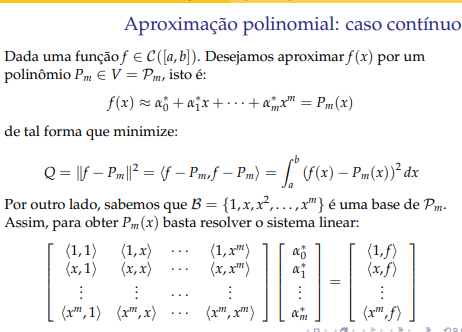

In [1]:
 ############################################################################
 ############# MÉTODO DOS MÍNIMOS QUADRADOS - CASO CONTÍNUO #################
 ############################################################################

 def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
    print("\n")

import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time

                  #### Fatoração de Cholesky ###
def fatoraCholesky(A):

    # definindo matriz H (inicializada com cópia da A)
    H = np.tril(A)
    n = np.shape(H)[0]

    for i in np.arange(n):
        for k in np.arange(i+1):
            tmp_sum = sum(H[i][j] * H[k][j] for j in np.arange(k))

            if (i == k): # Diagonal elements
                # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
                H[i][k] = m.sqrt(H[i][k] - tmp_sum)
            else:
                # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
                H[i][k] = (1.0 / H[k][k] * (H[i][k] - tmp_sum))

    return H

def sub_regressiva(U,y):
    # U é matriz triangular superior
    # y é o lado direito
    # retornarems a solução

    n = np.shape(y)[0]
    x = np.zeros(n)

    for i in np.arange(n-1,-1,-1): # limite superior:último índice (menor) -1:-1 (step é decremento) --> 4:2:-1 percorre 4 e 3.
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]

    return x

def sub_progressiva(L,b):
    # L é matriz triangular superior
    # b é lado direito
    # retornarems a solução

    n = np.shape(b)[0]
    z = np.zeros(n)

    for i in np.arange(n):
        z[i] = (b[i]-L[i,0:i].dot(z[0:i]))/L[i,i] #z[np.arange(i)] --> percorre até i-1

    return z

#Exemplo 01: Aproximar a função $f(x) = e^x$ pela parábola $p(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2$.

#Dedução:

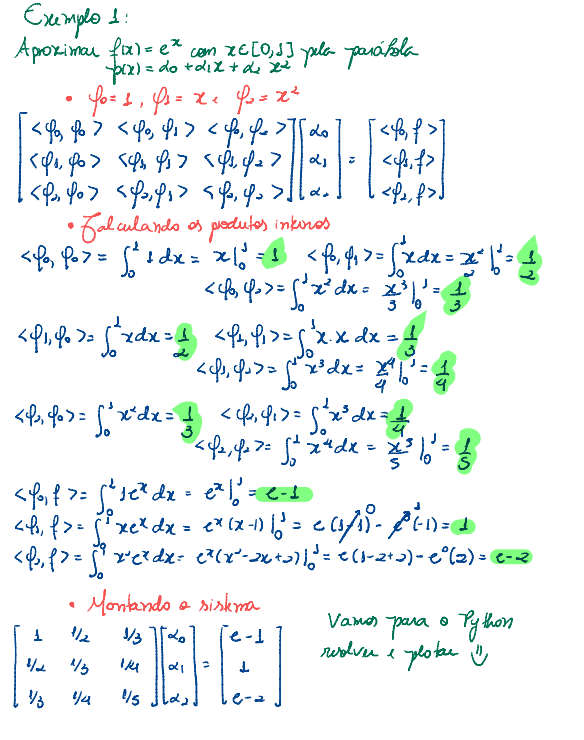

#Vamos para o Python resolver e plotar!

       1       0.5  0.333333  
     0.5  0.333333      0.25  
0.333333      0.25       0.2  


[1.718281828459045, 1, 0.7182818284590451]
[1.01299131 0.85112505 0.83918398]


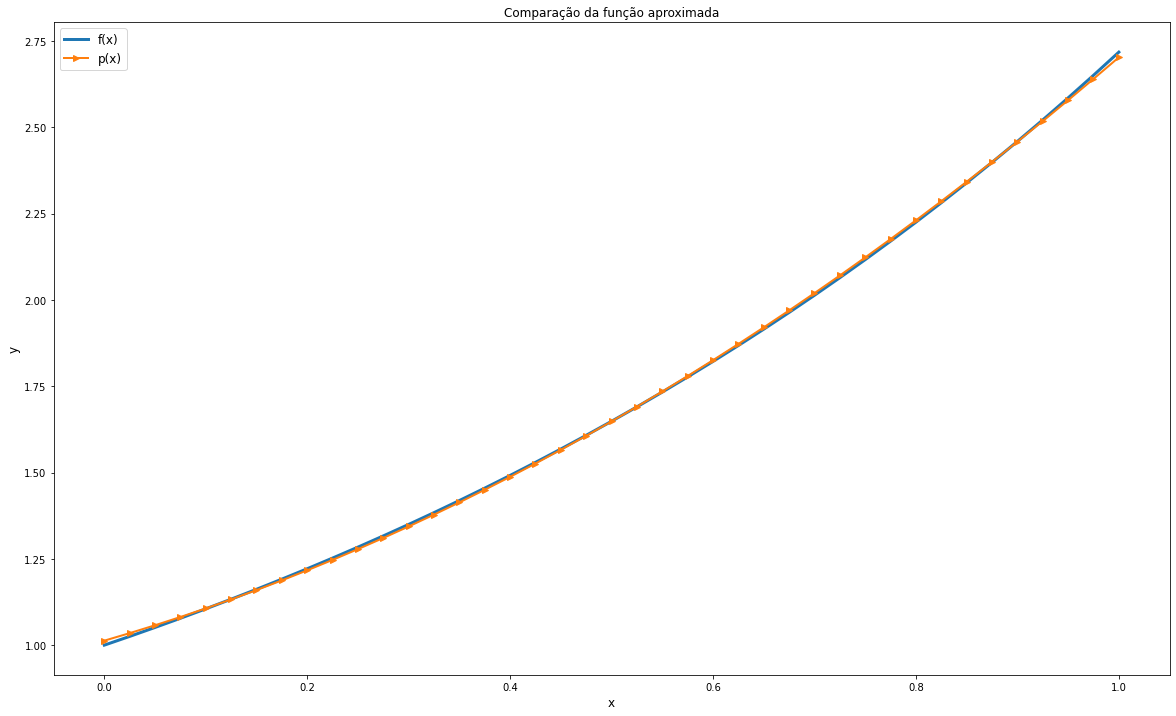

In [ ]:
              ###########################################
              ############### Exemplo 1 #################
              ###########################################
A = np.array([[    1.0, 1.0/2.0, 1.0/3.0],
              [1.0/2.0, 1.0/3.0, 1.0/4.0],
              [1.0/3.0, 1.0/4.0, 1.0/5.0]], dtype='double')
matprint(A);

e = np.exp(1);
b = [e-1,1,e-2];
print(b);

# Usando rotinas do python para resolução de sistema
# alpha = np.linalg.solve(A,b);
# print(alpha)

# Usando nossa rotina
(H) = fatoraCholesky(A)
z = sub_progressiva(H,b)
alpha = sub_regressiva(np.transpose(H),z)
print(alpha)

p = lambda x: alpha[0] + alpha[1]*x + alpha[2]*x**2;
x = np.linspace(0, 1, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,12),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'p(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
[1.         1.03389511 1.06893911 1.10517092 1.14263081 1.18136041
 1.22140276 1.26280234 1.30560517 1.34985881 1.39561243 1.44291687
 1.4918247  1.54239027 1.59466976 1.64872127 1.70460487 1.76238264
 1.8221188  1.88387972 1.94773404 2.01375271 2.08200908 2.15257902
 2.22554093 2.30097589 2.37896773 2.45960311 2.54297164 2.62916595
 2.71828183]
        0  1  
0.0333333  1  
0.0666667  1  
      0.1  1  
 0.133333  1  
 0.166667  1  
      0.2  1  
 0.233333  1  
 0.266667  1  
      0.3  1  
 0.333333  1  
 0.366667  1  
      0.4  1  
 0.433333  1  
 0.466667  1  
      0.5  1  
 0.533333  1  
 0.566667  1  
      0.6  1  
 0.633333  1  
 0.6

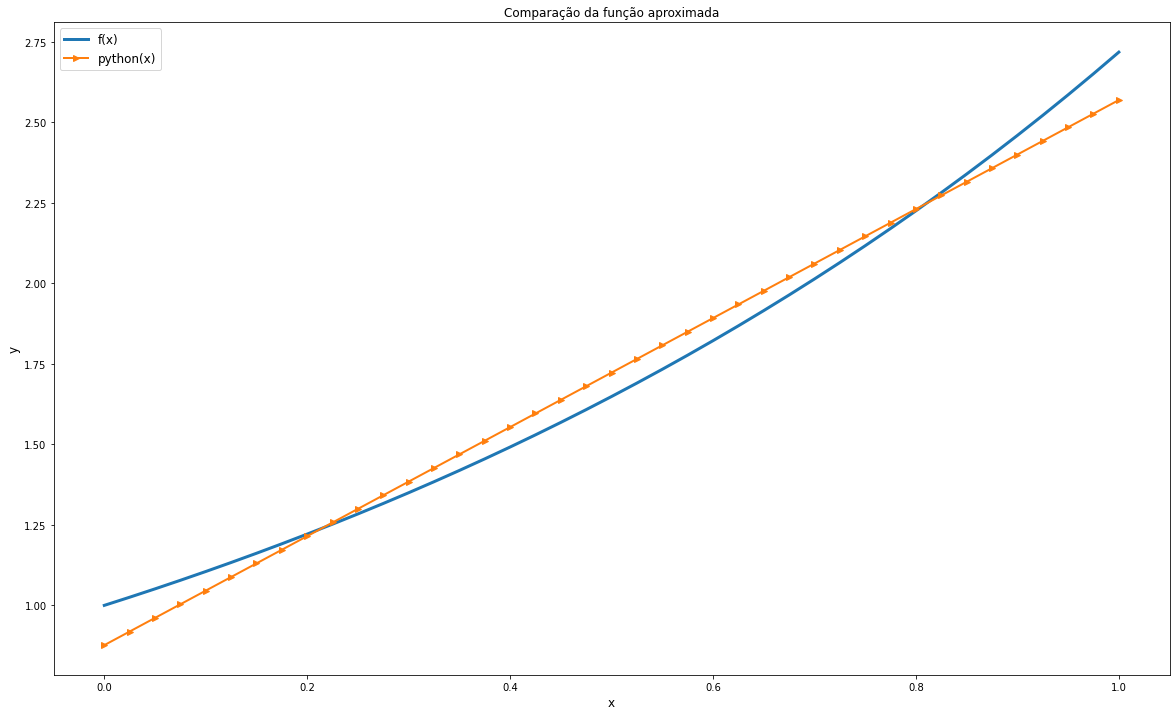

In [ ]:
#########################################################
# Vamos aproximar para uma reta usando função do Python #
#########################################################

x_data = np.linspace(0,1, num=31, endpoint=True);
y_data = np.exp(x_data);
print(x_data)
print(y_data)

A = np.transpose(np.vstack([x_data, np.ones(len(x_data))]))
matprint(A)
alpha_python = np.linalg.lstsq(A, y_data, rcond=None)[0];
print(alpha_python)

# Vamos plotar os resultados
plt.figure(figsize=(20,12),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,alpha_python[0]*x+alpha_python[1],label = 'python(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

#Exemplo 02: Aproximar a função $f(x) = e^x$ pela função $g(x) = ab^x$.


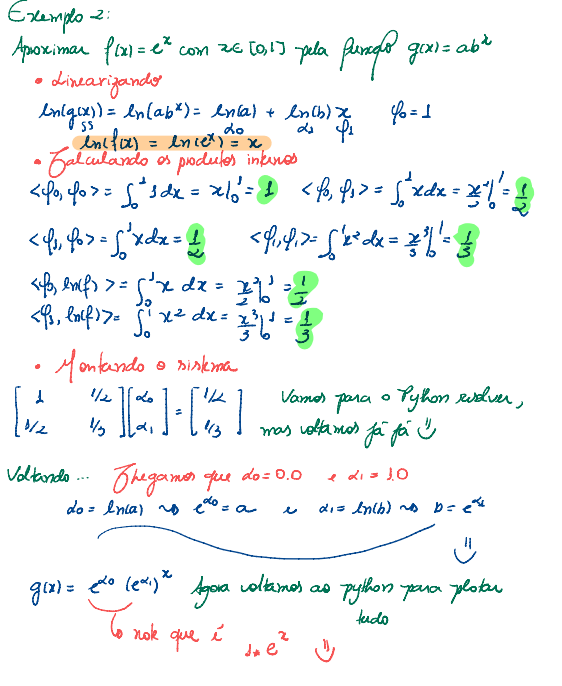

#Vamos para o Python resolver e plotar!

  1       0.5  
0.5  0.333333  


[0.5, 0.3333333333333333]
[0. 1.]
1.0
2.718281828459045


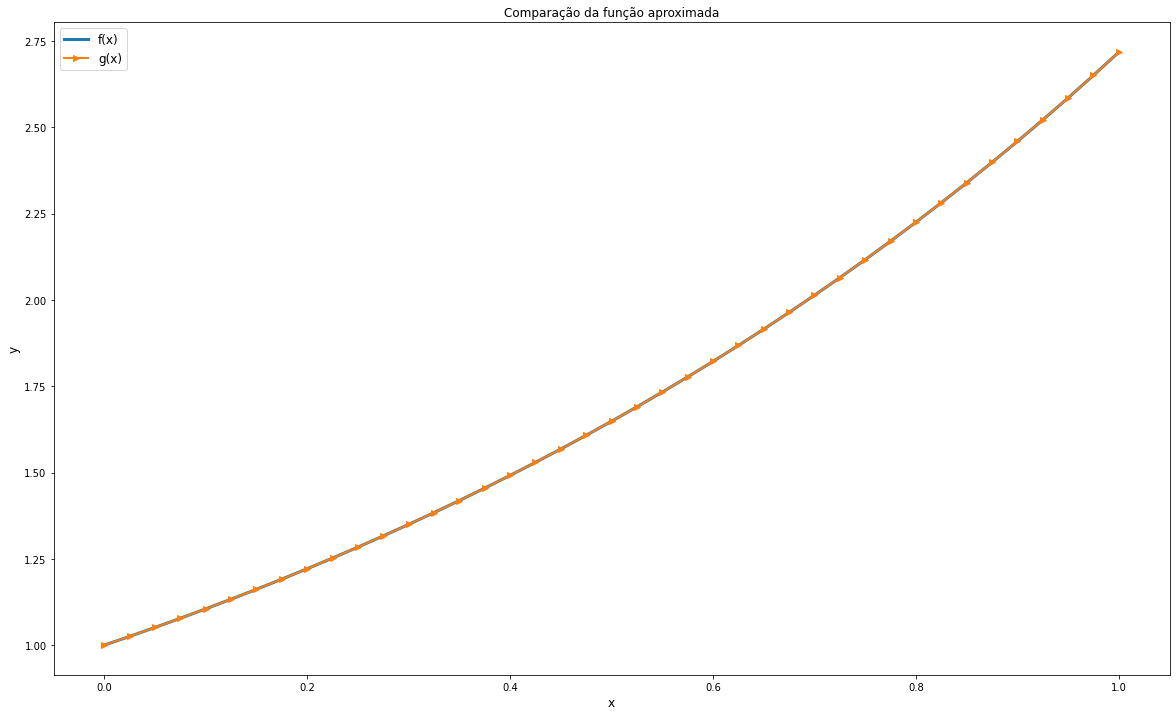

In [ ]:
            ###########################################
            ############### Exemplo 2 #################
            ###########################################
A = np.array([[    1.0, 1.0/2.0],
              [1.0/2.0, 1.0/3.0]], dtype='double')
matprint(A);

e = np.exp(1);
b_vec = [1.0/2.0,1.0/3.0];
print(b_vec);

# Usando rotinas do python para resolução de sistema
alpha = np.linalg.solve(A,b_vec);
print(alpha)

# Usando nossas rotinas
# (H) = fatoraCholesky(A)
# z = sub_progressiva(H,b_vec)
# alpha = sub_regressiva(np.transpose(H),z)
# print(alpha)

# Calculando os coeficientes da aproximação
a = np.exp(alpha[0]); b = np.exp(alpha[1]);
print(a);
print(b);
g = lambda x: a*(b**x);
x = np.linspace(0, 1, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,12),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,g(x),label = 'g(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

#Exemplo 03: Aproximar a função $f(x) = \sin(\pi x)$ pela parábola $p(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2$.


#Dedução:

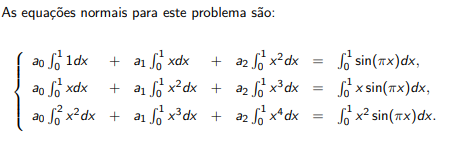

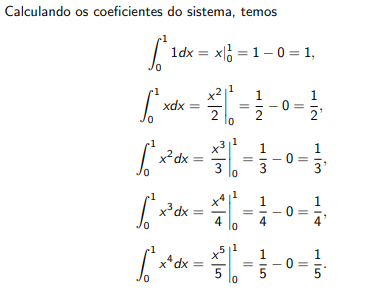

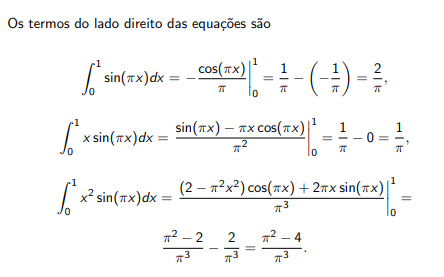

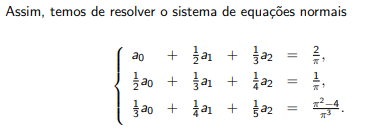

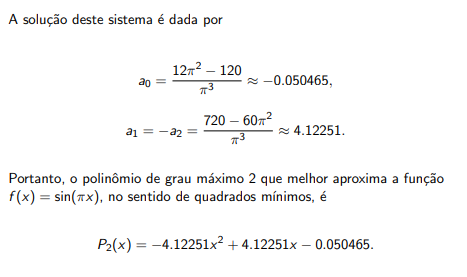

#Vamos para o Python resolver e plotar!

       1       0.5  0.333333  
     0.5  0.333333      0.25  
0.333333      0.25       0.2  


[0.6366197723675814, 0.3183098861837907, 0.1893037484509927]
[-0.0504655   4.12251162 -4.12251162]


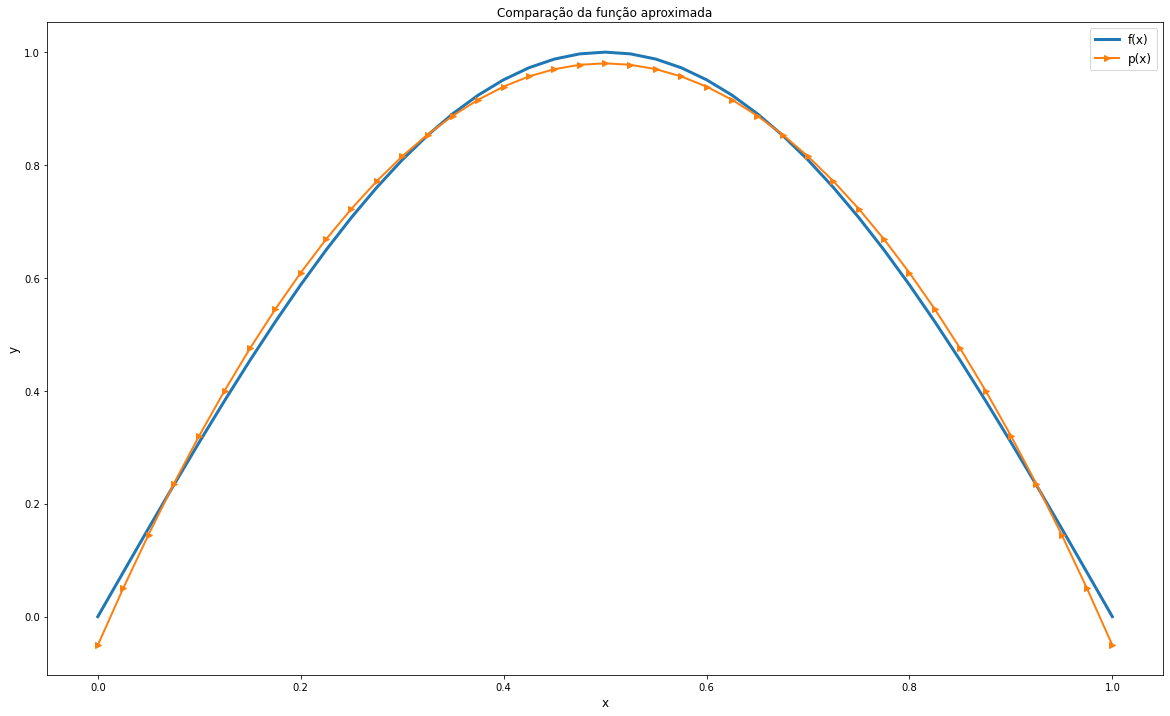

In [ ]:
                  ###########################################
                  ############### Exemplo 3 #################
                  ###########################################

A = np.array([[    1.0, 1.0/2.0, 1.0/3.0],
              [1.0/2.0, 1.0/3.0, 1.0/4.0],
              [1.0/3.0, 1.0/4.0, 1.0/5.0]], dtype='double')
matprint(A);

b = [2.0/m.pi,1.0/(m.pi),(m.pi**2 - 4)/(m.pi**3)];
print(b);

# Usando rotinas do python para resolução de sistema
# alpha = np.linalg.solve(A,b);
# print(alpha)

# Usando nossas rotinas
(H) = fatoraCholesky(A)
z = sub_progressiva(H,b)
alpha = sub_regressiva(np.transpose(H),z)
print(alpha)

p = lambda x: alpha[0] + alpha[1]*x + alpha[2]*x**2;
x = np.linspace(0, 1, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,12),facecolor='white')
plt.plot(x,np.sin(m.pi*x),label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'p(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

# <font color='yellow'> **Caso discreto </font>**

#Decomposição QR

#Em álgebra linear, uma decomposição **QR** (também chamada de fatoração QR) de uma matriz é uma decomposição de uma matriz **A** em um produto **A = QR** de uma matriz ortogonal **Q** e uma matriz triangular superior **R**.

#Exemplo: $$A={\begin{pmatrix}12&-51&4\\6&167&-68\\-4&24&-41\end{pmatrix}}.$$

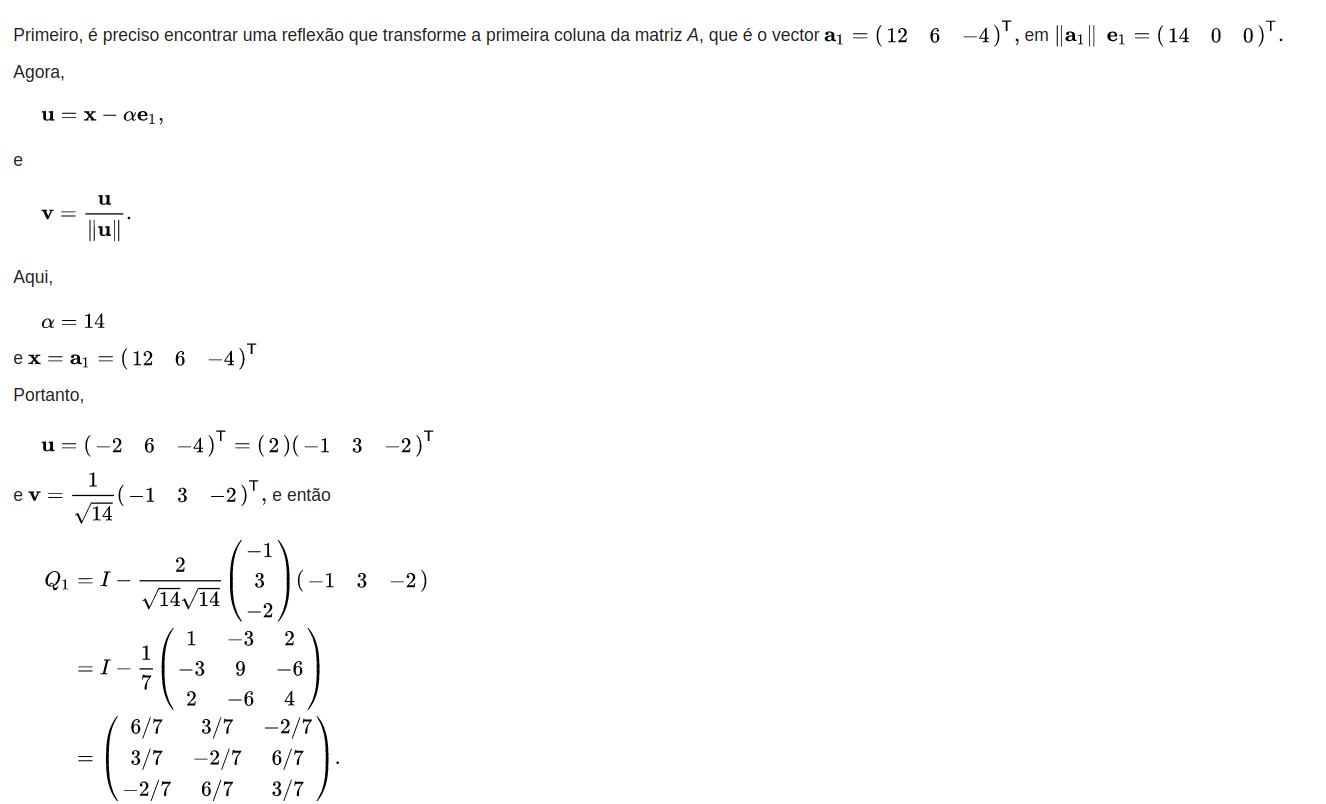

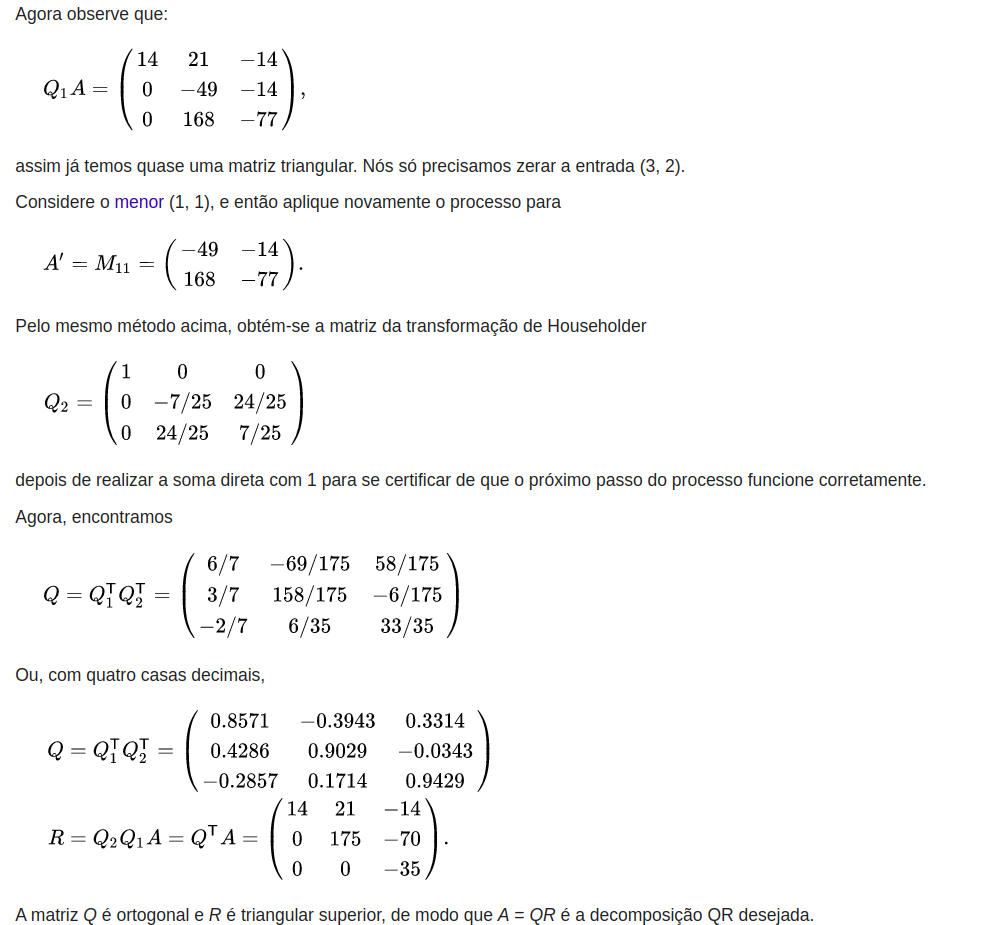

[-1, 0, 1, 2]
[0, -1, 0, 7]
[ 2.   0.2 -1.6]
[ 2.   0.2 -1.6]


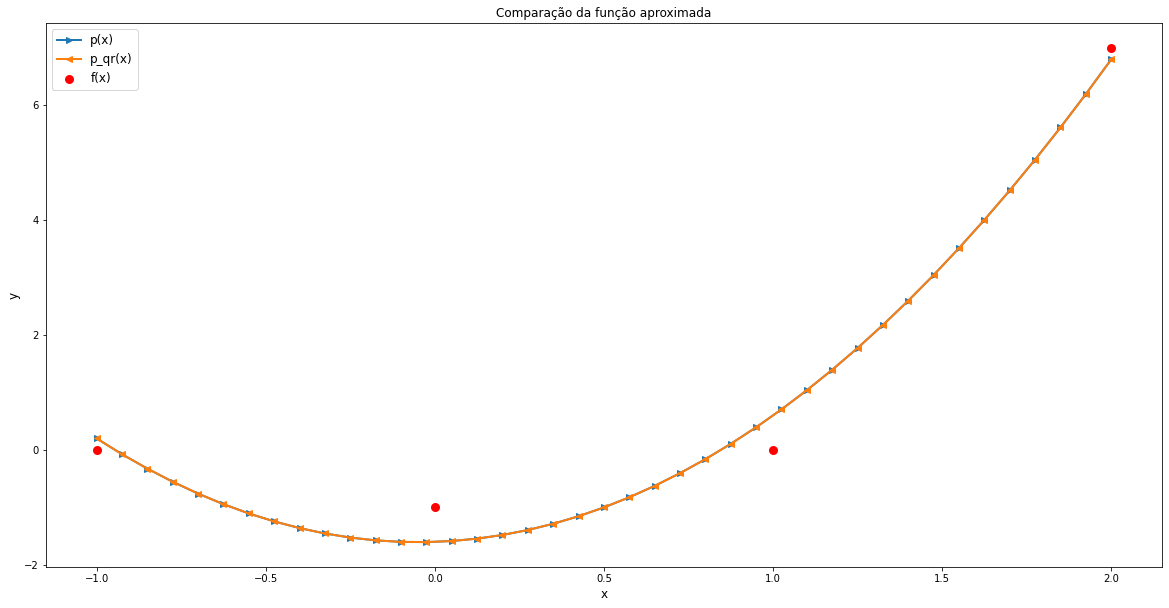

In [ ]:
  ############################################################################
  ############# MÉTODO DOS MÍNIMOS QUADRADOS - CASO DISCRETO #################
  ############################################################################

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
    print("\n")

import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time
#*#*#*#*#*#*##*#*#*#*#*#*##*#*#*#*#*#*##*#*#*#*#*#*##*#*#*#*#*#*##*#*#*#*#*#*#

          ### Implementação do MMQ - Discreto ###
def mmq(x,y,k):
    X = np.vander(x,k); # a matriz de Vandermonde aqui coloca o vetor unitário na última coluna
    A = np.transpose(X).dot(X);
    b = np.transpose(X).dot(y);
    a = np.linalg.solve(A,b);

    return a;

def mmq_qr(x,y,k):
    X = np.vander(x,k); # a matriz de Vandermonde aqui coloca o vetor unitário na última coluna

    (Q,R) = np.linalg.qr(X)

    b = np.transpose(Q).dot(y);
    a = np.linalg.solve(R,b);

    return a;


########################
#### Exemplo slide 51  #
########################


x = [-1, 0, 1, 2]; ###
y = [0, -1, 0, 7]; ###
print(x)
print(y)

a = mmq(x,y,3) # usamos 3 pois queremos um polinômio de grau 2
a_qr = mmq_qr(x,y,3) # usamos 3 pois queremos um polinômio de grau 2
print(a)
print(a_qr)

p = lambda x: a[2] + a[1]*x + a[0]*x**2;
p_qr = lambda x: a_qr[2] + a_qr[1]*x + a_qr[0]*x**2;

x_cont = np.linspace(-1, 2, num=41, endpoint=True)

# Vamos plotar os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(x,y,label = 'f(x)',linewidth = 3,color='red')
plt.plot(x_cont,p(x_cont),label = 'p(x)',linewidth = 2,marker='>')
plt.plot(x_cont,p_qr(x_cont),label = 'p_qr(x)',linewidth = 2,marker='<')
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Comparação da função aproximada')
plt.legend(fontsize='large')
plt.show()

#Exercício 03 da lista

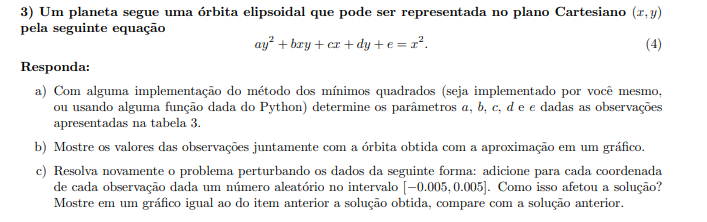

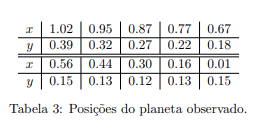

1  0.39  1.02  0.3978  0.1521  
1  0.32  0.95   0.304  0.1024  
1  0.27  0.87  0.2349  0.0729  
1  0.22  0.77  0.1694  0.0484  
1  0.18  0.67  0.1206  0.0324  
1  0.15  0.56   0.084  0.0225  
1  0.13  0.44  0.0572  0.0169  
1  0.12   0.3   0.036  0.0144  
1  0.13  0.16  0.0208  0.0169  
1  0.15  0.01  0.0015  0.0225  


[1.0404e+00 9.0250e-01 7.5690e-01 5.9290e-01 4.4890e-01 3.1360e-01
 1.9360e-01 9.0000e-02 2.5600e-02 1.0000e-04]


[-0.43289427  3.22294034  0.55144696  0.14364618 -2.63562548]




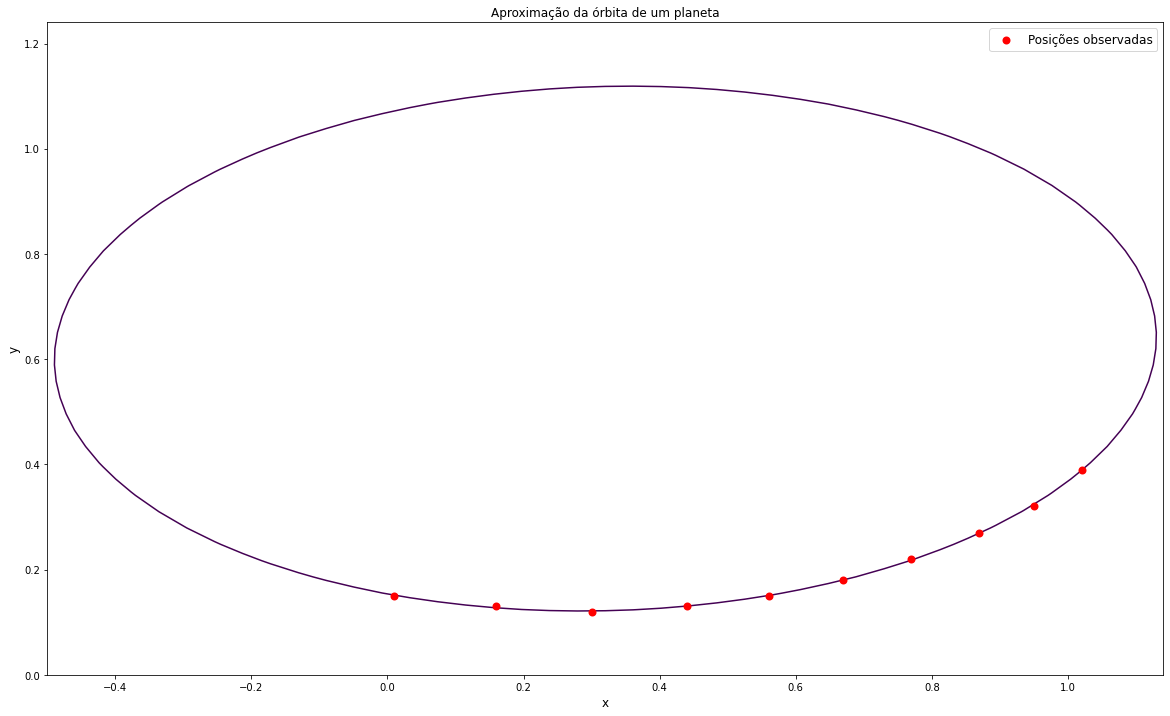

In [ ]:
                      ######################
                      # Exercício da lista #
                      ######################
x = np.array([1.02,0.95,0.87,0.77,0.67,0.56,0.44,0.30,0.16,0.01], dtype='double');
y = np.array([0.39,0.32,0.27,0.22,0.18,0.15,0.13,0.12,0.13,0.15], dtype='double');
n = len(x);

X = np.transpose(np.vstack([np.ones(n), y, x, x*y, y*y])) # aqui como eu que montei a matriz, a coluna unitária é a primeira
matprint(X)
Y = x*x;
print(Y)

# Fazendo o MMQ
(Q,R) = np.linalg.qr(X)

b = np.transpose(Q).dot(Y);
coef = np.linalg.solve(R,b);

elipse = lambda x,y: coef[4]*y*y + coef[3]*x*y + coef[2]*x + coef[1]*y + coef[0] - x*x;

print('\n')
print(coef)
print('\n')

x_range = np.linspace(-0.5, 1.14, num=41, endpoint=True)
y_range = np.linspace(0.0, 1.24, num=41, endpoint=True)
X_range, Y_range = np.meshgrid(x_range,y_range)

# Plote dos resultados....
plt.figure(figsize=(20,12),facecolor='white')
plt.scatter(x,y,label = 'Posições observadas',linewidth = 2,color='red',zorder=2)
plt.contour(X_range, Y_range, elipse(X_range,Y_range), [0], zorder=1)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.title('Aproximação da órbita de um planeta')
plt.legend(fontsize='large')
plt.show()